In [1]:
%matplotlib inline

In [4]:
from load_published_fits import load_tng
tng, t_t = load_tng()

In [5]:
from diffmah.measure_mahs import get_clean_sample_mask, measure_target_data

t_min, t_max = 1.5, 13.7
t_target = np.linspace(t_min, t_max, 50)
lgt_target = np.log10(t_target)
np.save('tng_t_target', t_target)

In [6]:
nmax_to_scatter = 2_000

xlims = -0.7, 1.4
ylims = -3.4, 1.8


## $M_{\rm peak}=10^{11.5}M_{\odot}$

In [7]:
from astropy.table import Table
lgmp_sample = 11.5

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 4551
n_late = 6732
Percentage of halos passing the cut = 95.3%


Check that we were not too aggressive with the clip

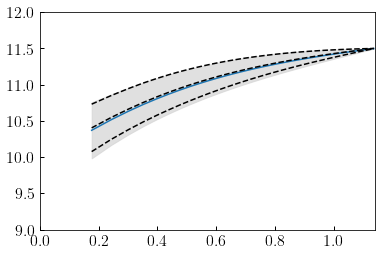

In [8]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


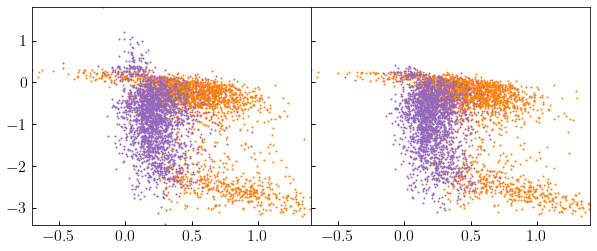

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{11.75}M_{\odot}$

In [10]:
from astropy.table import Table
lgmp_sample = 11.75

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 2513
n_late = 4158
Percentage of halos passing the cut = 95.6%


Check that we were not too aggressive with the clip

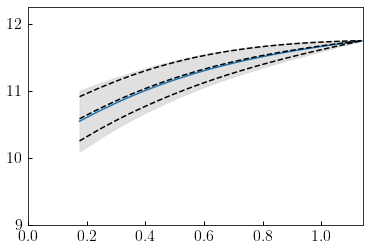

In [11]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


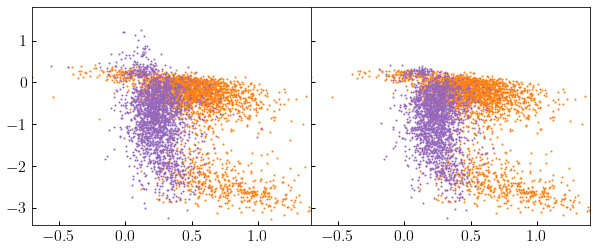

In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{12}M_{\odot}$

In [25]:
from astropy.table import Table
lgmp_sample = 12.

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 1459
n_late = 2655
Percentage of halos passing the cut = 96.1%


Check that we were not too aggressive with the clip

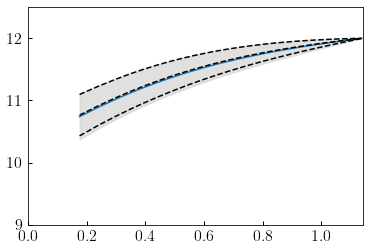

In [26]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


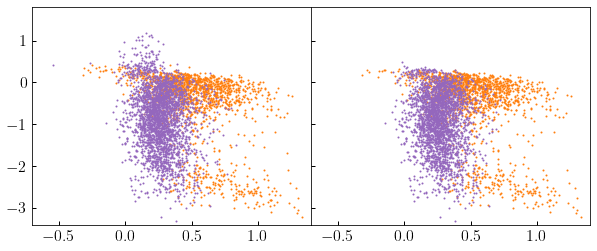

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{12.25}M_{\odot}$

In [22]:
from astropy.table import Table
lgmp_sample = 12.25

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 833
n_late = 1582
Percentage of halos passing the cut = 96.2%


Check that we were not too aggressive with the clip

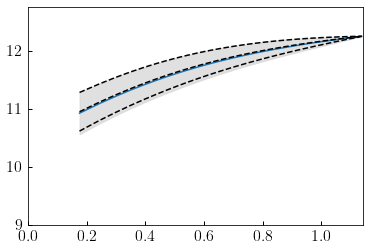

In [23]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


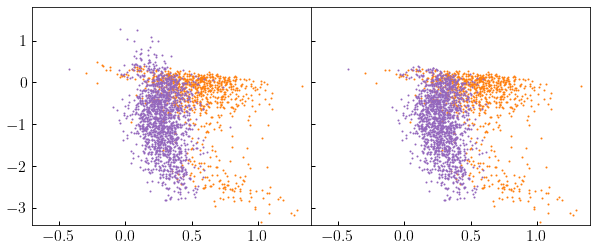

In [24]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{12.5}M_{\odot}$

In [31]:
from astropy.table import Table
lgmp_sample = 12.5

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 477
n_late = 823
Percentage of halos passing the cut = 96.1%


Check that we were not too aggressive with the clip

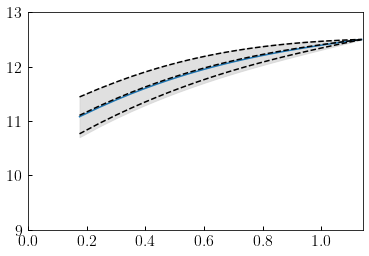

In [32]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


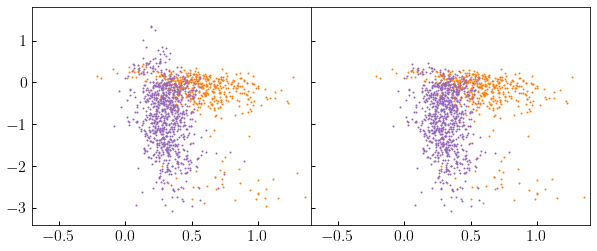

In [30]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{12.75}M_{\odot}$

In [36]:
from astropy.table import Table
lgmp_sample = 12.75

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 625
n_late = 1018
Percentage of halos passing the cut = 96.0%


Check that we were not too aggressive with the clip

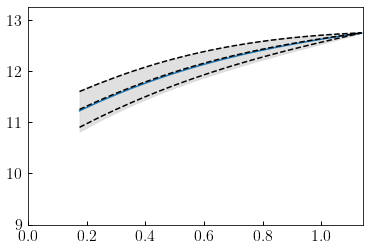

In [37]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


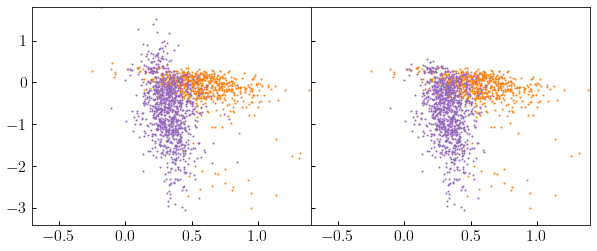

In [38]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{13}M_{\odot}$

In [39]:
from astropy.table import Table
lgmp_sample = 13.0

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 348
n_late = 547
Percentage of halos passing the cut = 96.2%


Check that we were not too aggressive with the clip

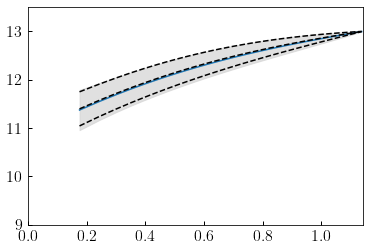

In [40]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


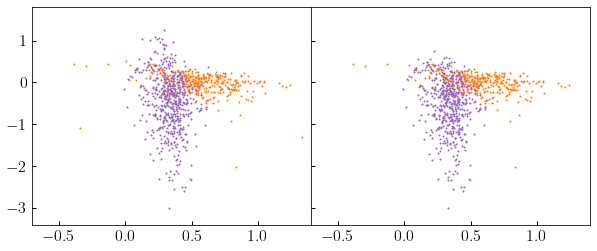

In [41]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{13.25}M_{\odot}$

In [42]:
from astropy.table import Table
lgmp_sample = 13.25

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 360
n_late = 666
Percentage of halos passing the cut = 95.5%


Check that we were not too aggressive with the clip

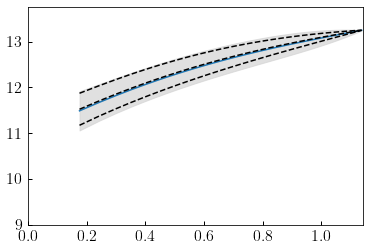

In [43]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


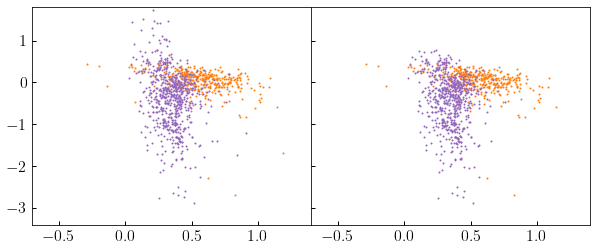

In [44]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{13.5}M_{\odot}$

In [45]:
from astropy.table import Table
lgmp_sample = 13.5

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 177
n_late = 408
Percentage of halos passing the cut = 94.7%


Check that we were not too aggressive with the clip

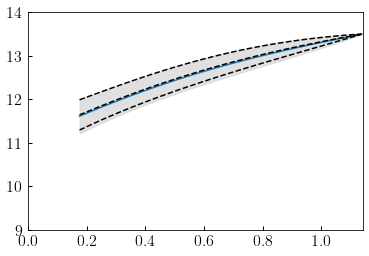

In [46]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


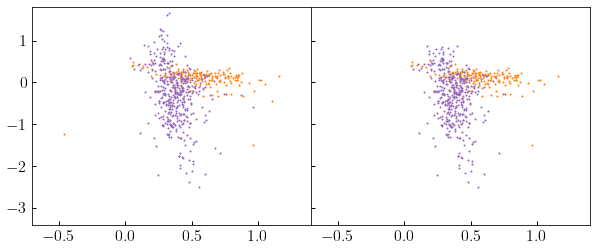

In [47]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)


## $M_{\rm peak}=10^{13.75}M_{\odot}$

In [48]:
from astropy.table import Table
lgmp_sample = 13.75

halos, t = Table(tng), t_t

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.15
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'tng_logmp_{0:.2f}'.format(lgmp_sample)
np.save('mean_log_mah_'+outpat, mean_log_mah)
np.save('var_log_mah_'+outpat, var_log_mah)
np.save('mean_dmhdt_'+outpat, mean_dmhdt)
np.save('var_dmhdt_'+outpat, var_dmhdt)


n_early = 132
n_late = 353
Percentage of halos passing the cut = 95.5%


Check that we were not too aggressive with the clip

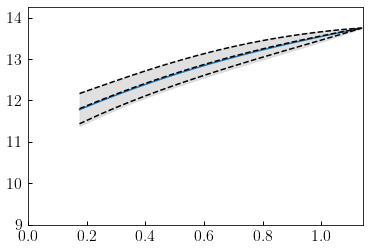

In [49]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

ylo, yhi = mean_log_mah2-np.sqrt(var_log_mah2), mean_log_mah2+np.sqrt(var_log_mah2)
__=ax.plot(lgt_target, mean_log_mah2, '--', color='k')
__=ax.plot(lgt_target, ylo, '--', color='k')
__=ax.plot(lgt_target, yhi, '--', color='k')


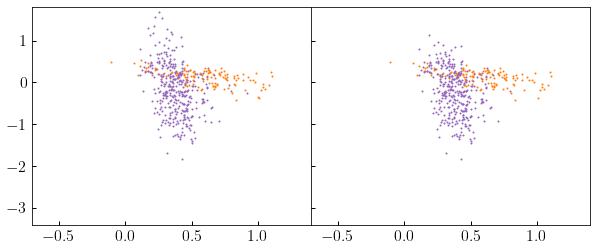

In [50]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
__=ax0.set_xlim(*xlims)
__=ax0.set_ylim(*ylims)


lgtc_msk = sample['mah_logtc'] < 0
n_o = lgtc_msk.sum()
n_p = len(lgtc_msk) - n_o
n_o_to_scatter = min(nmax_to_scatter, n_o)
n_p_to_scatter = min(nmax_to_scatter, n_p)
ns_o, ns_p = int(n_o/n_o_to_scatter), int(n_p/n_p_to_scatter)

__=ax0.scatter(sample['lge'][lgtc_msk][::ns_o], sample['lgl'][lgtc_msk][::ns_o], s=1, color=morange)
__=ax0.scatter(sample['lge'][~lgtc_msk][::ns_p], sample['lgl'][~lgtc_msk][::ns_p], s=1, color=mpurple)

lgtc_msk2 = sample2['mah_logtc'] < 0
__=ax1.scatter(sample2['lge'][lgtc_msk2][::ns_o], sample2['lgl'][lgtc_msk2][::ns_o], s=1, color=morange)
__=ax1.scatter(sample2['lge'][~lgtc_msk2][::ns_p], sample2['lgl'][~lgtc_msk2][::ns_p], s=1, color=mpurple)
